In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Salary_Data.csv")

In [5]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 0, 'YearsExperience')

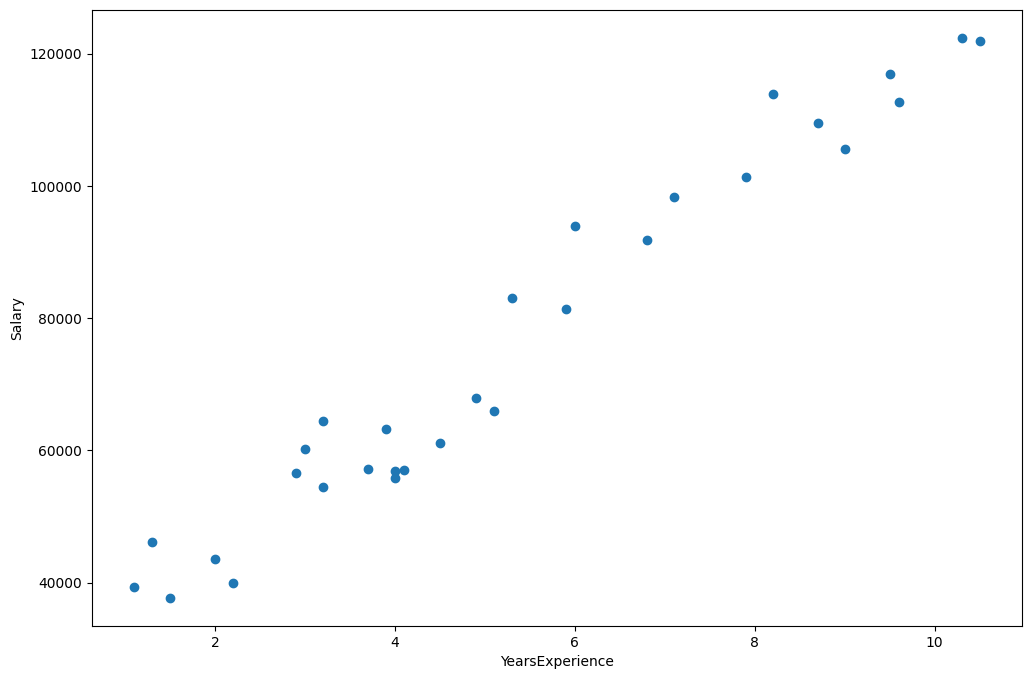

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(df[["YearsExperience"]],df["Salary"])
plt.ylabel("Salary")
plt.xlabel("YearsExperience")

In [9]:
x=df[['YearsExperience']]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [10]:
y=df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [11]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=45)

In [12]:
xtrain.head()

,YearsExperience
19,6.0
24,8.7
6,3.0
22,7.9
23,8.2


In [13]:
xtest.head()

,YearsExperience
16,5.1
27,9.6
25,9.0
5,2.9
13,4.1


# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg=LinearRegression()

In [16]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [17]:
reg.predict([[5.1]])

array([75355.80165197])

In [18]:
pred=reg.predict(xtest)
pred

array([ 75355.80165197, 119233.28128214, 113382.95066478,  53904.58938833,
        65605.25062304,  61705.03021147, 128008.77720817,  56829.75469701,
        63655.14041726])

In [19]:
df["Predicted Salary"]=reg.predict(x)
df.head()

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36353.597536
1,1.3,46205.0,38303.707742
2,1.5,37731.0,40253.817948
3,2.0,43525.0,45129.093462
4,2.2,39891.0,47079.203668


In [20]:
from sklearn.metrics import r2_score

In [21]:
Linear_acc=r2_score(ytest,pred)
Linear_acc

0.9452086365937471

# Save model

In [22]:
import pickle as pk

In [23]:
pk.dump(reg,open("salary_project","wb"))

In [24]:
reg2=pk.load(open("salary_project","rb"))

In [25]:
reg2.predict([[100]])

array([1000683.09429705])